In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5274s 31us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
y_train.shape

(50000, 10)

In [ ]:
y_train[0]

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

In [8]:
%matplotlib inline

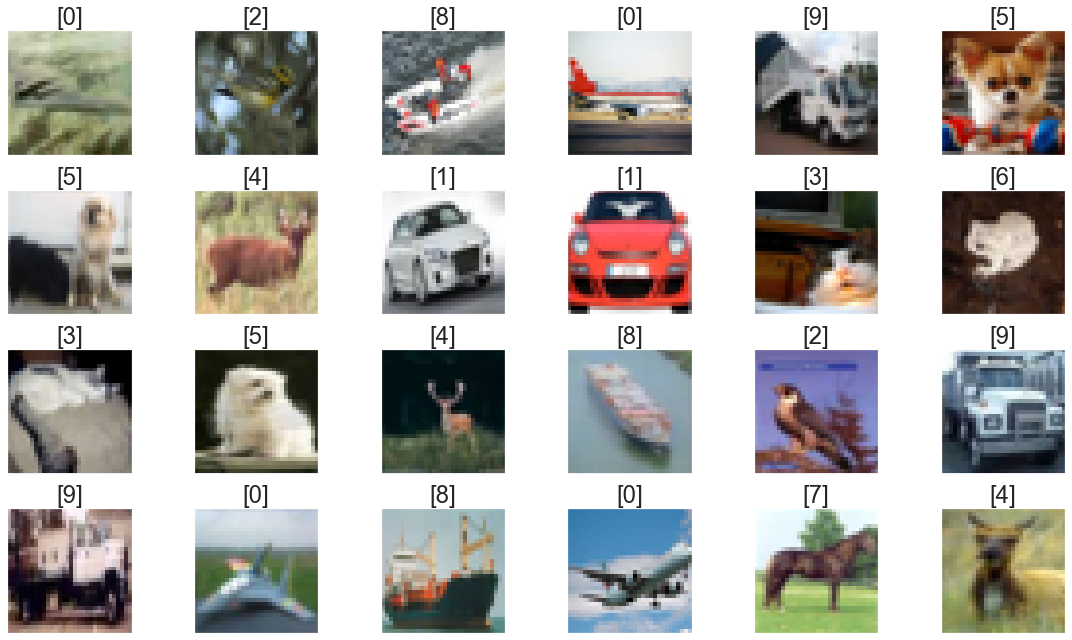

In [10]:
index = np.random.choice(np.arange(len(X_train)), size=24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [11]:
X_train = X_train.reshape((50000, 32, 32, 3))

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test = X_test.reshape((10000, 32, 32, 3))

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
X_train = X_train.astype('float32') / 255

In [16]:
X_train[4]

array([[[0.6666667 , 0.7058824 , 0.7764706 ],
        [0.65882355, 0.69803923, 0.76862746],
        [0.69411767, 0.7254902 , 0.79607844],
        ...,
        [0.63529414, 0.7019608 , 0.84313726],
        [0.61960787, 0.69803923, 0.8392157 ],
        [0.6156863 , 0.69411767, 0.83137256]],

       [[0.65882355, 0.70980394, 0.7764706 ],
        [0.6745098 , 0.7254902 , 0.7882353 ],
        [0.67058825, 0.7176471 , 0.78431374],
        ...,
        [0.62352943, 0.69411767, 0.83137256],
        [0.6117647 , 0.6901961 , 0.827451  ],
        [0.6039216 , 0.68235296, 0.81960785]],

       [[0.6039216 , 0.6666667 , 0.7294118 ],
        [0.58431375, 0.64705884, 0.70980394],
        [0.5058824 , 0.5647059 , 0.63529414],
        ...,
        [0.6313726 , 0.69803923, 0.8392157 ],
        [0.6156863 , 0.69411767, 0.83137256],
        [0.6039216 , 0.68235296, 0.81960785]],

       ...,

       [[0.2901961 , 0.32941177, 0.3137255 ],
        [0.29803923, 0.33333334, 0.31764707],
        [0.30588236, 0

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
X_test[4]

array([[[0.25490198, 0.26666668, 0.19607843],
        [0.27450982, 0.31764707, 0.2509804 ],
        [0.1882353 , 0.2509804 , 0.18039216],
        ...,
        [0.2       , 0.2627451 , 0.16078432],
        [0.21176471, 0.29803923, 0.20784314],
        [0.2627451 , 0.34117648, 0.25882354]],

       [[0.27058825, 0.3137255 , 0.22745098],
        [0.30980393, 0.4       , 0.31764707],
        [0.23529412, 0.2901961 , 0.22352941],
        ...,
        [0.21176471, 0.25882354, 0.17254902],
        [0.25490198, 0.3529412 , 0.27058825],
        [0.23921569, 0.31764707, 0.25882354]],

       [[0.28627452, 0.37254903, 0.28235295],
        [0.32941177, 0.42745098, 0.34117648],
        [0.28235295, 0.34509805, 0.27450982],
        ...,
        [0.30588236, 0.38431373, 0.29411766],
        [0.28627452, 0.38431373, 0.3019608 ],
        [0.1882353 , 0.23137255, 0.2       ]],

       ...,

       [[0.37254903, 0.49803922, 0.36078432],
        [0.35686275, 0.48235294, 0.3372549 ],
        [0.22352941, 0

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
y_train.shape

(50000, 10)

In [23]:
y_train[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
cnn = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Flatten())

In [33]:
cnn.add(Dense(units=128, activation='relu'))

In [34]:
cnn.add(Dense(units=10, activation='softmax'))

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [36]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [37]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 104s 148ms/step - loss: 1.4259 - accuracy: 0.4850 - val_loss: 1.1327 - val_accuracy: 0.6052
Epoch 2/5
704/704 [==============================] - 98s 140ms/step - loss: 1.0487 - accuracy: 0.6323 - val_loss: 0.9886 - val_accuracy: 0.6602
Epoch 3/5
704/704 [==============================] - 97s 138ms/step - loss: 0.9050 - accuracy: 0.6839 - val_loss: 0.9028 - val_accuracy: 0.6832
Epoch 4/5
704/704 [==============================] - 96s 136ms/step - loss: 0.7989 - accuracy: 0.7227 - val_loss: 0.8585 - val_accuracy: 0.7092
Epoch 5/5
704/704 [==============================] - 92s 131ms/step - loss: 0.7056 - accuracy: 0.7554 - val_loss: 0.8774 - val_accuracy: 0.7038


In [38]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.9137 - accuracy: 0.6921


In [39]:
accuracy

0.6920999884605408

In [40]:
loss

0.9136866331100464

In [41]:
predictions = cnn.predict(X_test)

In [43]:
images = X_test
incorrect_predictions = []

for index, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((index, images[index], predicted, expected))

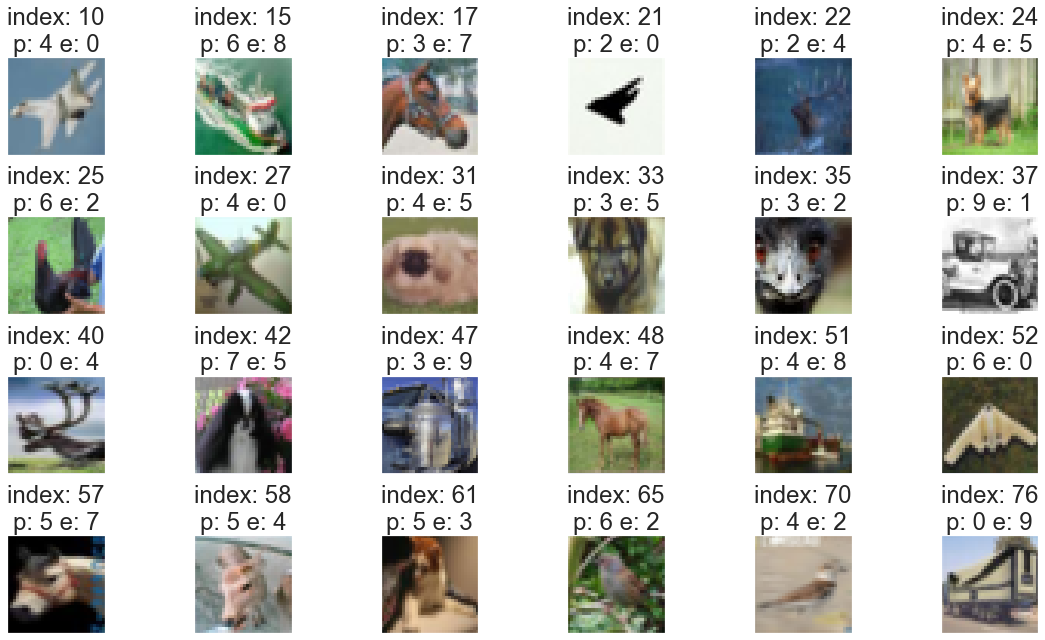

In [44]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted} e: {expected}')
plt.tight_layout()